<a href="https://colab.research.google.com/github/prithiba-A/Assignment_5-R_programming/blob/main/Assignment_5_R_programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment - R Programming**

Q1. Create a file that contains 1000 lines of random strings.


In [108]:
# Function to generate random strings
generate_random_string <- function(length) {
  chars <- c(letters, LETTERS, 0:9)  # Characters to choose from
  random_chars <- sample(chars, length, replace = TRUE)  # Randomly select characters
  paste(random_chars, collapse = "")  # Combine characters into a string
}

# Generate random strings and write to a file
num_lines <- 1000
file_path <- "random_strings.txt"

# Open the file for writing
file <- file(file_path, "w")

# Generate random strings and write each line to the file
for (i in 1:num_lines) {
  random_string <- generate_random_string(10)  # Generate a random string of length 10
  cat(random_string, "\n", file = file)  # Write the string to the file
}

# Close the file
close(file)

# Print a message indicating the file has been created
cat("File", file_path, "has been created with", num_lines, "lines of random strings.\n")


File random_strings.txt has been created with 1000 lines of random strings.


Q2. Create a random dataset of 100 rows and 30 columns. All the values are defined between [1,200].

In [109]:
# Set seed for reproducibility
set.seed(123)

In [110]:
# Generate a random dataset of 100 rows and 30 columns
dataset <- matrix(sample(1:200, 100*30, replace = TRUE), nrow = 100)

In [111]:
# Convert the dataset to a data frame
dataset <- as.data.frame(dataset)

In [112]:
# Print the dataset
print(dataset)

     V1  V2  V3  V4  V5  V6  V7  V8  V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19
1   159 165  61  64 100  81 140   7  91 195 156   9   1 156 138  32  32  62  47
2   179 136 152  80 108  55  72  68  42  56 186  37 176  15 125  53 129 117 157
3    14  51  63  36  45 134 127 120  74  22  30  54  94  60  38  23 162  55  61
4   195  74  54  35  10 168  41  53  53 145 167  24 126  17  12  82  10 114  62
5   170 178 151  87 170   6   8 101  63  99  70  14  52 189  35  58  69  22 153
6    50 106  26  67  24 128 185  24  73 142 196 158   7  41 104 151   5 152  69
7   118  98  33  48  92 111  52  68 159 119 195 109 197  25 187 115 183  12  23
8    43  74 185 194 146 156  67  67  83  64 174 190 138  76  33  25 122 115  67
9    14 127 157 111  59  32 168  11  55  24 187 116  36  19 171  38 114  44  70
10  118 174 115  23 137  49   2  74 114   8 115 111 136  52 118  30 130 148 147
11  153  17  10 195  53  84  65  93  18 148  48  40  49 199  11 166 155 100  11
12   90 190  53 137 139 193 135 133 108 

Perform
the following operations:

(i) Replace all the values with NA in the dataset defined between [10, 60]. Print the count of number
rows having missing values.


In [113]:
# (i) Replace values with NA in the specified range and count rows with missing values
dataset[10:60, ] <- NA
num_rows_missing <- sum(rowSums(is.na(dataset)) > 0)
cat("Number of rows with missing values:", num_rows_missing, "\n\n")

Number of rows with missing values: 51 



(ii) Replace all the NA values with the average of the column value.

In [114]:
# (ii) Replace all NA values with the average of the column value
column_means <- colMeans(dataset, na.rm = TRUE)

# Replace NA values column-wise
for (i in 1:ncol(dataset)) {
  dataset[is.na(dataset[, i]), i] <- column_means[i]
}
# Print the dataset after replacing NA values
cat("Dataset after replacing NA values:\n")
print(dataset)

Dataset after replacing NA values:
           V1       V2       V3       V4       V5       V6       V7        V8
1   159.00000 165.0000  61.0000  64.0000 100.0000  81.0000 140.0000   7.00000
2   179.00000 136.0000 152.0000  80.0000 108.0000  55.0000  72.0000  68.00000
3    14.00000  51.0000  63.0000  36.0000  45.0000 134.0000 127.0000 120.00000
4   195.00000  74.0000  54.0000  35.0000  10.0000 168.0000  41.0000  53.00000
5   170.00000 178.0000 151.0000  87.0000 170.0000   6.0000   8.0000 101.00000
6    50.00000 106.0000  26.0000  67.0000  24.0000 128.0000 185.0000  24.00000
7   118.00000  98.0000  33.0000  48.0000  92.0000 111.0000  52.0000  68.00000
8    43.00000  74.0000 185.0000 194.0000 146.0000 156.0000  67.0000  67.00000
9    14.00000 127.0000 157.0000 111.0000  59.0000  32.0000 168.0000  11.00000
10   95.14286 109.8571 123.4082 103.5306 109.1224 113.1429  96.7551  80.04082
11   95.14286 109.8571 123.4082 103.5306 109.1224 113.1429  96.7551  80.04082
12   95.14286 109.8571 123.40

(iii) Find the Pearson correlation among all the columns and plot heat map. Also select those columns
having correlation <=0.7

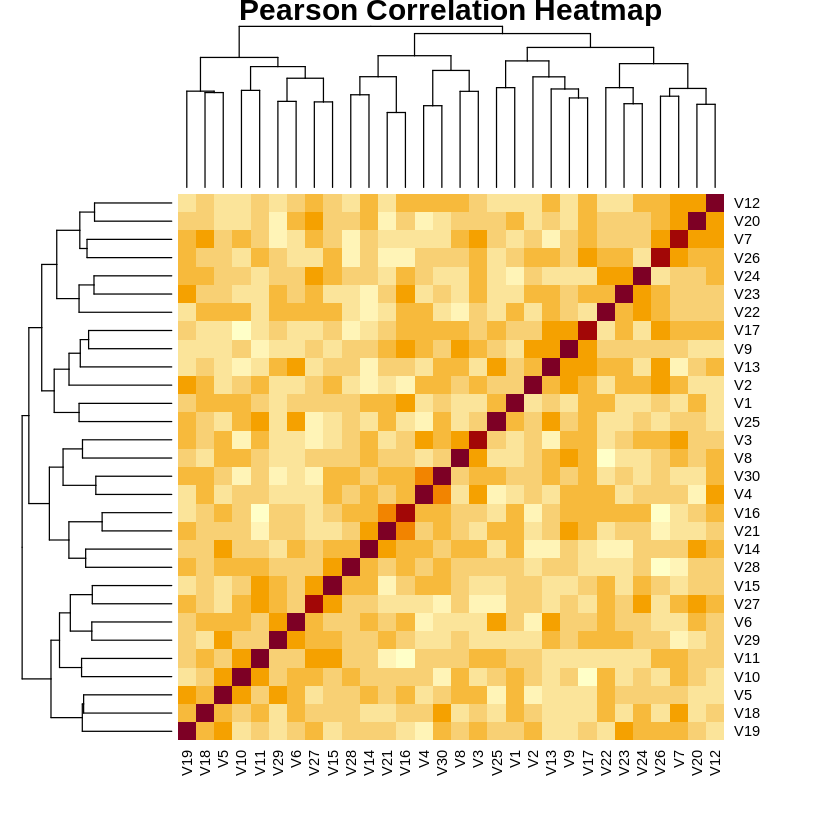

In [115]:
#(iii) Calculate Pearson correlation and plot heat map
cor_matrix <- cor(dataset)
cor_threshold <- 0.7
columns_with_low_correlation <- colnames(dataset)[which(abs(cor_matrix) <= cor_threshold, arr.ind = TRUE)]
heatmap(cor_matrix, main = "Pearson Correlation Heatmap")

(iv) Normalize all the values in the dataset between 0 and 10.

In [116]:
# (iv) Normalize values between 0 and 10
normalized_dataset <- scale(dataset, center = FALSE, scale = apply(dataset, 2, function(x) max(x) - min(x))) * 10

In [117]:
cat("Normalized Dataset:\n")
print(normalized_dataset)

Normalized Dataset:
               V1         V2         V3         V4         V5         V6
  [1,]  8.1122449  8.5492228  3.0964467  3.2989691  5.2631579  4.1752577
  [2,]  9.1326531  7.0466321  7.7157360  4.1237113  5.6842105  2.8350515
  [3,]  0.7142857  2.6424870  3.1979695  1.8556701  2.3684211  6.9072165
  [4,]  9.9489796  3.8341969  2.7411168  1.8041237  0.5263158  8.6597938
  [5,]  8.6734694  9.2227979  7.6649746  4.4845361  8.9473684  0.3092784
  [6,]  2.5510204  5.4922280  1.3197970  3.4536082  1.2631579  6.5979381
  [7,]  6.0204082  5.0777202  1.6751269  2.4742268  4.8421053  5.7216495
  [8,]  2.1938776  3.8341969  9.3908629 10.0000000  7.6842105  8.0412371
  [9,]  0.7142857  6.5803109  7.9695431  5.7216495  3.1052632  1.6494845
 [10,]  4.8542274  5.6920799  6.2643738  5.3366295  5.7432868  5.8321060
 [11,]  4.8542274  5.6920799  6.2643738  5.3366295  5.7432868  5.8321060
 [12,]  4.8542274  5.6920799  6.2643738  5.3366295  5.7432868  5.8321060
 [13,]  4.8542274  5.6920799  6

(v) Replace all the values in the dataset with 1 if value <=0.5 else with 0.

In [118]:
# (v) Replace values with 1 if <= 0.5 else with 0
binary_dataset <- ifelse(normalized_dataset <= 0.5, 1, 0)

In [119]:
cat("\nBinary Dataset:\n")
print(binary_dataset)


Binary Dataset:
       V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20
  [1,]  0  0  0  0  0  0  0  1  0   0   0   1   1   0   0   0   0   0   0   1
  [2,]  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0
  [3,]  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0
  [4,]  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0
  [5,]  0  0  0  0  0  1  1  0  0   0   0   0   0   0   0   0   0   0   0   0
  [6,]  0  0  0  0  0  0  0  0  0   0   0   0   1   0   0   0   1   0   0   0
  [7,]  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0
  [8,]  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0
  [9,]  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0
 [10,]  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0
 [11,]  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0
 [12,]  0  0  0  0  0  0  0  0  0   0   0   0  

Q3. Create a random dataset of 500 rows and 10 columns.
Columns 1 to 4 are defined between [-10, 10];
Columns 5 to 8 are defined between [10, 20];
Columns 9 to 10 are defined between [-100, 100].

In [120]:
# Set seed for reproducibility
set.seed(123)

In [121]:
# Generate a random dataset of 500 rows and 10 columns
dataset <- matrix(NA, nrow = 500, ncol = 10)

In [122]:
# Generate random values for columns 1 to 4 [-10, 10]
dataset[, 1:4] <- runif(500, min = -10, max = 10)

In [123]:
# Generate random values for columns 5 to 8 [10, 20]
dataset[, 5:8] <- runif(500, min = 10, max = 20)

In [124]:
# Generate random values for columns 9 to 10 [-100, 100]
dataset[, 9:10] <- runif(500, min = -100, max = 100)

In [125]:
# Convert the dataset to a data frame
dataset <- as.data.frame(dataset)

In [126]:
# Print the dataset
print(dataset)

             V1          V2          V3          V4       V5       V6       V7
1   -4.24844960 -4.24844960 -4.24844960 -4.24844960 13.53606 13.53606 13.53606
2    5.76610271  5.76610271  5.76610271  5.76610271 13.66441 13.66441 13.66441
3   -1.82046156 -1.82046156 -1.82046156 -1.82046156 12.87100 12.87100 12.87100
4    7.66034808  7.66034808  7.66034808  7.66034808 10.79973 10.79973 10.79973
5    8.80934569  8.80934569  8.80934569  8.80934569 13.65454 13.65454 13.65454
6   -9.08887001 -9.08887001 -9.08887001 -9.08887001 11.78014 11.78014 11.78014
7    0.56210976  0.56210976  0.56210976  0.56210976 15.36054 15.36054 15.36054
8    7.84838089  7.84838089  7.84838089  7.84838089 15.03949 15.03949 15.03949
9    1.02870029  1.02870029  1.02870029  1.02870029 19.45035 19.45035 19.45035
10  -0.86770529 -0.86770529 -0.86770529 -0.86770529 13.41321 13.41321 13.41321
11   9.13666691  9.13666691  9.13666691  9.13666691 14.64714 14.64714 14.64714
12  -0.93331688 -0.93331688 -0.93331688 -0.93331688 

Apply following clustering algorithms; determine the optimal number of clusters and plot distance metric
graph using each algorithm.

(i) K-Mean clustering


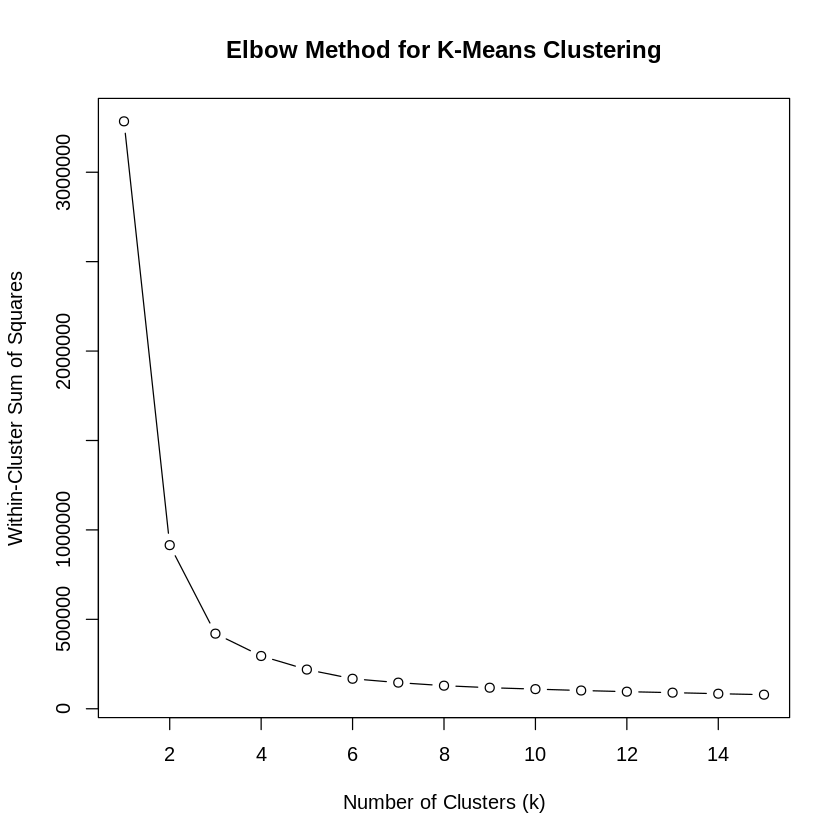

In [127]:
# (i) K-Means Clustering

# Determine the optimal number of clusters using the elbow method
wss <- vector("numeric", length = 15)  # Initialize within-cluster sum of squares vector

# Perform K-Means clustering for different values of k
for (k in 1:15) {
  kmeans_result <- kmeans(dataset, centers = k, nstart = 10)
  wss[k] <- kmeans_result$tot.withinss
}

# Plot the within-cluster sum of squares graph
plot(1:15, wss, type = "b", xlab = "Number of Clusters (k)", ylab = "Within-Cluster Sum of Squares",
     main = "Elbow Method for K-Means Clustering")


(ii) Hierarchical clustering


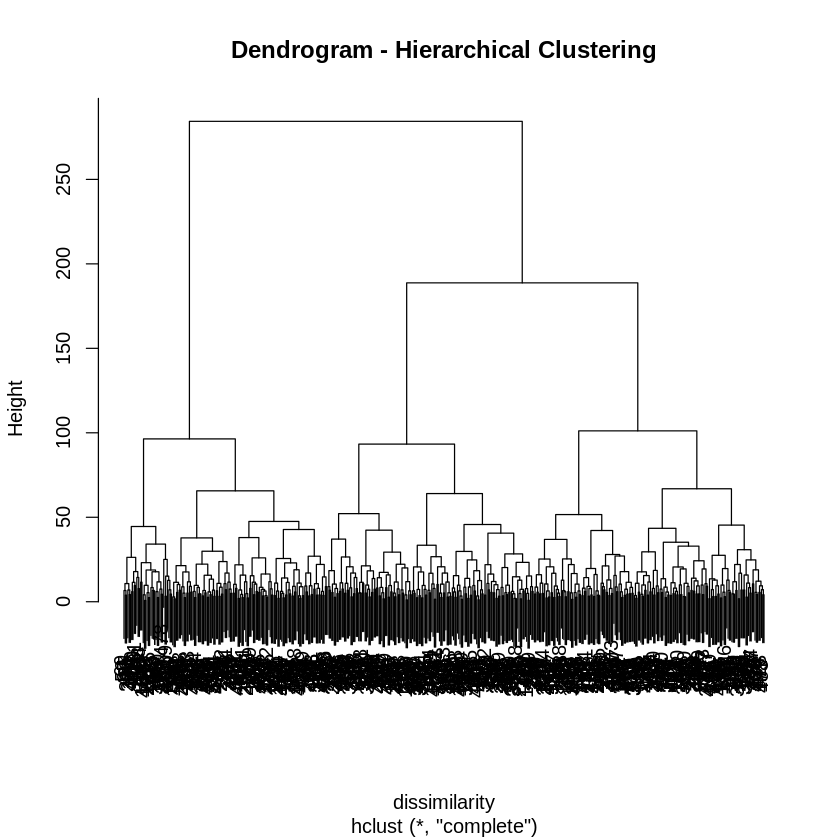

In [128]:
# (ii) Hierarchical Clustering

# Compute the dissimilarity matrix using Euclidean distance
dissimilarity <- dist(dataset, method = "euclidean")

# Perform hierarchical clustering using complete linkage
hc_result <- hclust(dissimilarity, method = "complete")

# Plot the dendrogram
plot(hc_result, main = "Dendrogram - Hierarchical Clustering")

Q4. Create a random dataset of 600 rows and 15 columns. All the values are defined between [-100,100]

In [129]:
# Set seed for reproducibility
set.seed(123)

In [130]:
# Generate a random dataset of 600 rows and 15 columns
dataset <- matrix(runif(600*15, min = -100, max = 100), nrow = 600)

In [131]:
# Convert the dataset to a data frame
dataset <- as.data.frame(dataset)

In [132]:
# Print the dataset
print(dataset)

             V1          V2           V3          V4           V5          V6
1   -42.4844960 -52.5540605  71.71828146 -68.9471728  46.46434947 -58.8346160
2    57.6610271  37.2980702  77.47695092  69.1702011  21.94214039  88.5078095
3   -18.2046156 -54.8363153  -2.18170029 -57.1239149 -55.12557328 -24.1352416
4    76.6034808 -36.3010824  43.61836179  33.9746490  83.23420268  25.2480282
5    88.0934569 -65.2032366  -2.65888548  23.5512902  60.55220496 -63.2995196
6   -90.8887001  60.2859167  97.74177219 -90.0000446 -37.51827748  31.8415237
7     5.6210976 -70.7435884 -87.04977408  89.8797551 -54.54976074  46.9385821
8    78.4838089  64.5434783 -68.46744441  16.5104063  31.51904079  -0.8641134
9    10.2870029 -33.8004343  57.06972368  72.1908674  47.14623126  73.7437488
10   -8.6770529 -25.1661224   8.43765796   3.6934499  -6.98114908  66.3675889
11   91.3666691  25.9490848 -16.69053095 -46.7745033  72.72106586  96.6597651
12   -9.3331688 -80.6732514  99.77652980  19.4755327  35.0001166

Perform the following operations:


(i) Plot scatter graph between Column 5 and Column 6.

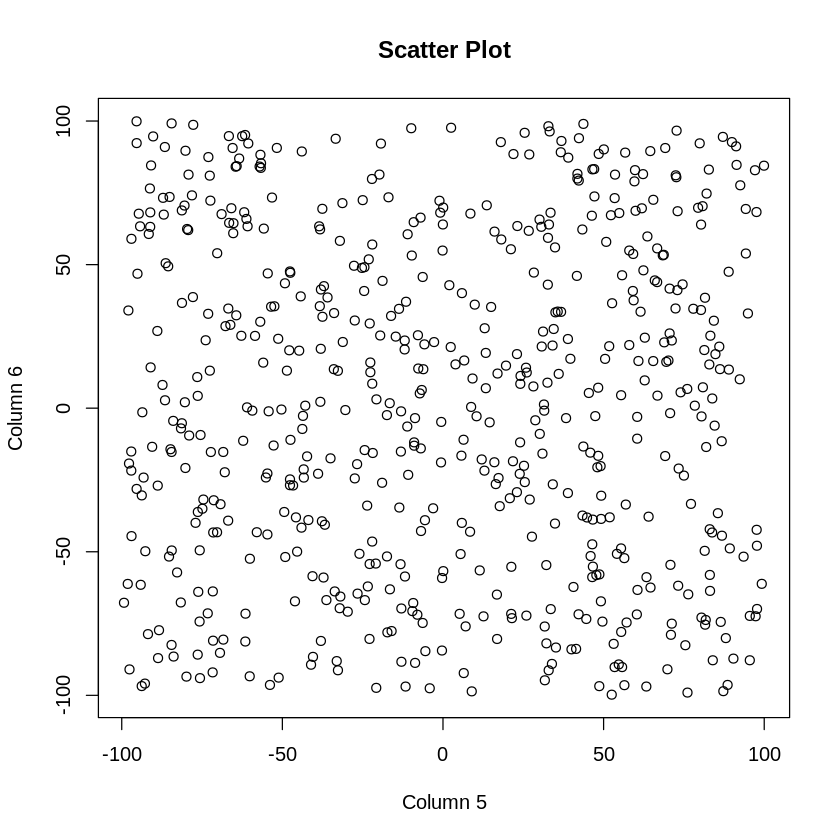

In [133]:
# (i) Plot scatter graph between Column 5 and Column 6
plot(dataset$V5, dataset$V6, xlab = "Column 5", ylab = "Column 6", main = "Scatter Plot")

(ii) Plot histogram of each column in single graph.


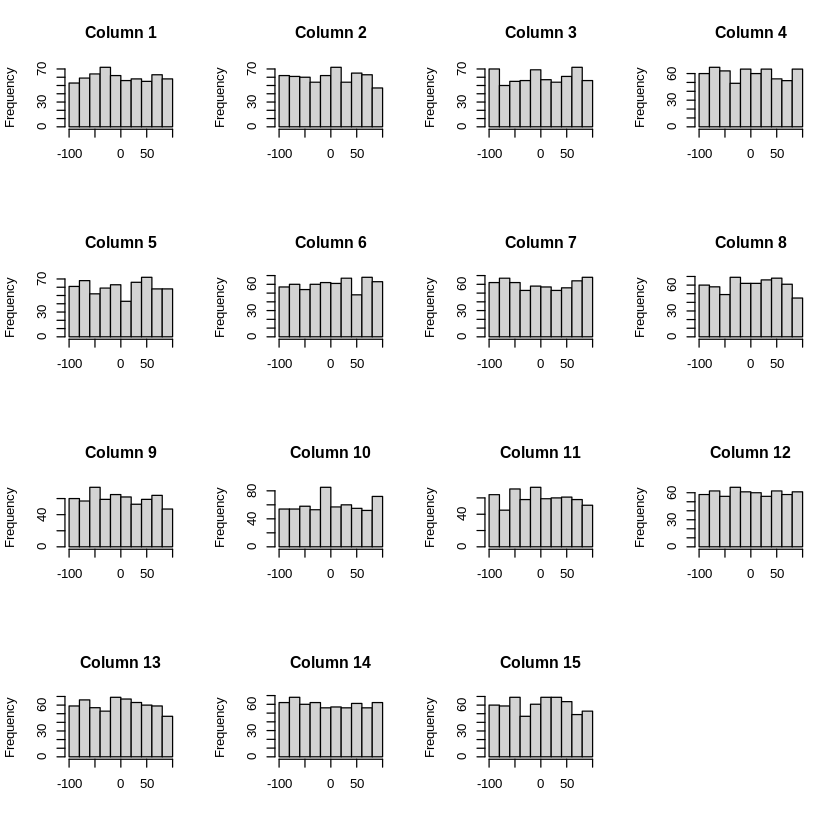

In [134]:
# (ii) Plot histogram of each column in a single graph
par(mfrow = c(4, 4))  # Set the layout to 4x4

for (i in 1:15) {
  hist(dataset[, i], main = paste("Column", i), xlab = "")
}

(iii) Plot the Box plot of each column in single graph.

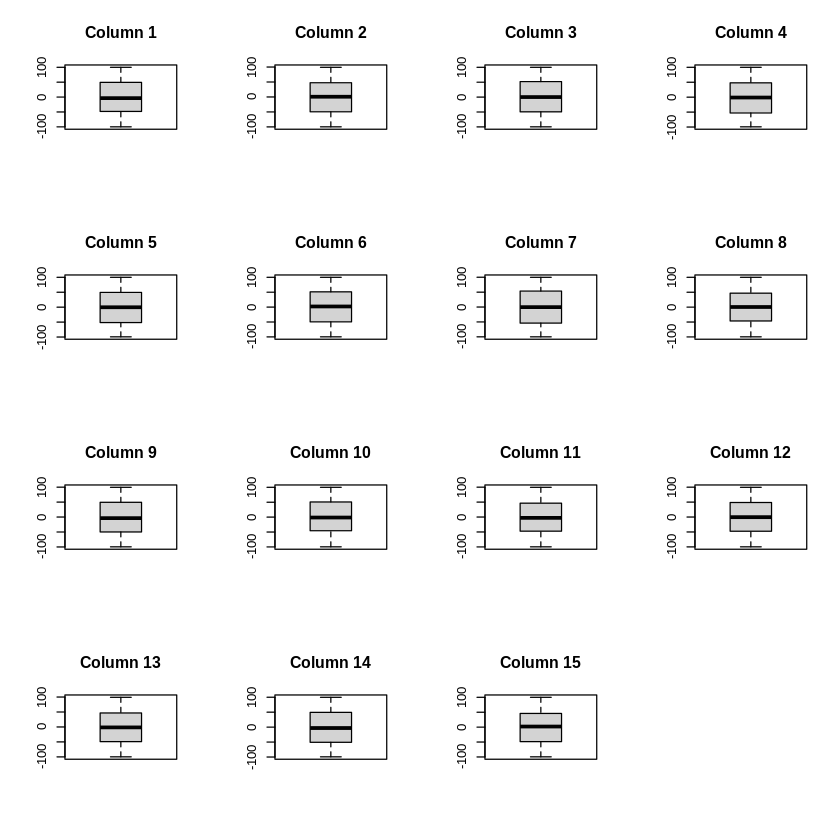

In [135]:
# (iii) Plot the Box plot of each column in a single graph
par(mfrow = c(4, 4))  # Set the layout to 4x4

for (i in 1:15) {
  boxplot(dataset[, i], main = paste("Column", i), ylab = "")
}

Q5. Create a random dataset of 500 rows and 5 columns:
All the values are defined between [5,10].

In [136]:
# Set seed for reproducibility
set.seed(123)

In [137]:
# Generate a random dataset of 500 rows and 5 columns
dataset <- matrix(runif(500*5, min = 5, max = 10), nrow = 500)

In [138]:
# Convert the dataset to a data frame
dataset <- as.data.frame(dataset)

In [139]:
# Print the dataset
print(dataset)

          V1       V2       V3       V4       V5
1   6.437888 6.768030 6.368114 9.690141 5.798370
2   8.941526 6.832207 7.969335 9.940017 5.722579
3   7.044885 6.435501 5.800924 7.281598 5.745902
4   9.415087 5.399865 9.267151 6.153075 7.572171
5   9.702336 6.827271 9.238696 8.477446 7.464137
6   5.227782 5.890069 7.389434 7.783162 8.081714
7   7.640527 7.680269 8.868461 7.923550 7.237114
8   9.462095 7.519744 6.477000 7.168156 5.278384
9   7.757175 9.725176 5.328141 7.130875 5.026982
10  7.283074 6.706606 7.202666 7.984272 6.109171
11  9.784167 7.323569 7.310494 7.260428 9.254816
12  7.266671 5.412656 6.704672 9.783043 6.336731
13  8.387853 9.300534 5.925702 9.222152 7.993001
14  7.863167 6.978303 7.534989 6.113843 8.042998
15  5.514623 8.679497 5.095955 7.100851 9.960792
16  9.499125 5.858717 8.868430 7.099915 5.955950
17  6.230439 7.273808 7.798325 5.103954 8.766953
18  5.210298 8.851024 8.207313 6.902240 6.211937
19  6.639604 5.313250 7.342161 7.111742 6.637261
20  9.772518 9.07540

Perform the following operations:

(i) Perform t-Test on each column

In [140]:
# (i) Perform t-Test on each column
t_test_results <- apply(dataset, 2, t.test)

# Print t-Test results
cat("t-Test results for each column:\n")
for (i in 1:ncol(dataset)) {
  cat("Column", i, ":\n")
  print(t_test_results[[i]])
  cat("\n")
}

t-Test results for each column:
Column 1 :

	One Sample t-test

data:  newX[, i]
t = 117.56, df = 499, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 7.351464 7.601373
sample estimates:
mean of x 
 7.476418 


Column 2 :

	One Sample t-test

data:  newX[, i]
t = 115.29, df = 499, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 7.368610 7.624109
sample estimates:
mean of x 
  7.49636 


Column 3 :

	One Sample t-test

data:  newX[, i]
t = 117.93, df = 499, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 7.345020 7.593909
sample estimates:
mean of x 
 7.469464 


Column 4 :

	One Sample t-test

data:  newX[, i]
t = 116.53, df = 499, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 7.386422 7.639779
sample estimates:
mean of x 
 7.513101 


Column 5 :

	One Sample t-test



(ii) Perform Wilcoxon Signed Rank Test on each column.

In [141]:
# (ii) Perform Wilcoxon Signed Rank Test on each column
wilcox_test_results <- apply(dataset, 2, wilcox.test)

# Print Wilcoxon Signed Rank Test results
cat("Wilcoxon Signed Rank Test results for each column:\n")
for (i in 1:ncol(dataset)) {
  cat("Column", i, ":\n")
  print(wilcox_test_results[[i]])
  cat("\n")
}

Wilcoxon Signed Rank Test results for each column:
Column 1 :

	Wilcoxon signed rank test with continuity correction

data:  newX[, i]
V = 125250, p-value < 2.2e-16
alternative hypothesis: true location is not equal to 0


Column 2 :

	Wilcoxon signed rank test with continuity correction

data:  newX[, i]
V = 125250, p-value < 2.2e-16
alternative hypothesis: true location is not equal to 0


Column 3 :

	Wilcoxon signed rank test with continuity correction

data:  newX[, i]
V = 125250, p-value < 2.2e-16
alternative hypothesis: true location is not equal to 0


Column 4 :

	Wilcoxon signed rank test with continuity correction

data:  newX[, i]
V = 125250, p-value < 2.2e-16
alternative hypothesis: true location is not equal to 0


Column 5 :

	Wilcoxon signed rank test with continuity correction

data:  newX[, i]
V = 125250, p-value < 2.2e-16
alternative hypothesis: true location is not equal to 0




(iii) Perform Two Sample t-Test and Wilcoxon Rank Sum Test on Column 3 and Column 4

In [142]:
# (iii) Perform Two Sample t-Test and Wilcoxon Rank Sum Test on Column 3 and Column 4
column3 <- dataset[, 3]
column4 <- dataset[, 4]
two_sample_t_test <- t.test(column3, column4)
wilcox_rank_sum_test <- wilcox.test(column3, column4)

# Print Two Sample t-Test and Wilcoxon Rank Sum Test results
cat("Two Sample t-Test results between Column 3 and Column 4:\n")
print(two_sample_t_test)
cat("\n")

cat("Wilcoxon Rank Sum Test results between Column 3 and Column 4:\n")
print(wilcox_rank_sum_test)

Two Sample t-Test results between Column 3 and Column 4:

	Welch Two Sample t-test

data:  column3 and column4
t = -0.48279, df = 997.68, p-value = 0.6293
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2209985  0.1337259
sample estimates:
mean of x mean of y 
 7.469464  7.513101 


Wilcoxon Rank Sum Test results between Column 3 and Column 4:

	Wilcoxon rank sum test with continuity correction

data:  column3 and column4
W = 122733, p-value = 0.6197
alternative hypothesis: true location shift is not equal to 0

